In [1]:
from transformer_lens import HookedTransformer
import torch
DEVICE = torch.device('cpu')
MODEL_NAME = "google/gemma-2-2b"

# Load Gemma model - must be loaded exactly this way for consistency
model = HookedTransformer.from_pretrained(
            MODEL_NAME,
            device=DEVICE,
            center_unembed=False,
            center_writing_weights=False
        )
model.eval()

import importlib
from simple_acdc import *

/Users/andrewgomes/Documents/LLMConstructions/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
`torch_dtype` is deprecated! Use `dtype` instead!
`torch_dtype` is deprecated! Use `dtype` instead!
Loading checkpoint shards: 100%|██████████| 3/3 [00:00<00:00, 55.97it/s]



Loaded pretrained model google/gemma-2-2b into HookedTransformer


In [25]:
import importlib
import simple_acdc
importlib.reload(simple_acdc)

<module 'simple_acdc' from '/Users/andrewgomes/Documents/LLMConstructions/simple_acdc.py'>

Threshold Sweep: 100%|██████████| 40/40 [02:39<00:00,  3.99s/it]



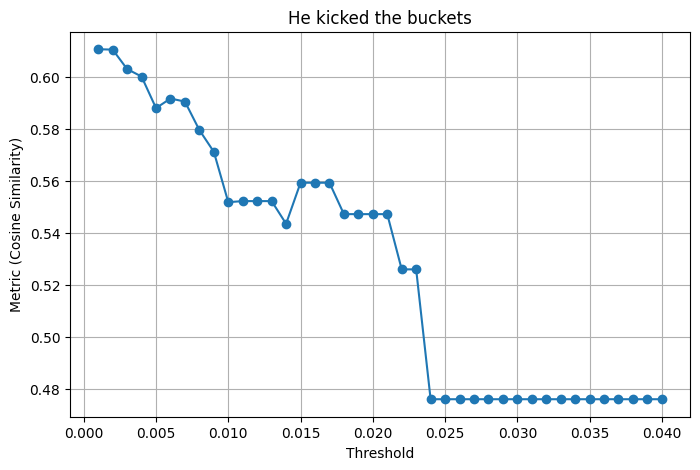

Threshold Sweep: 100%|██████████| 40/40 [02:26<00:00,  3.67s/it]



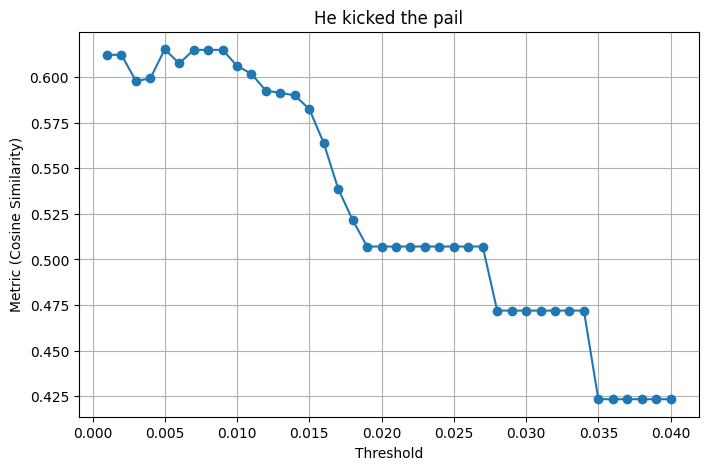

Threshold Sweep: 100%|██████████| 40/40 [03:13<00:00,  4.84s/it]



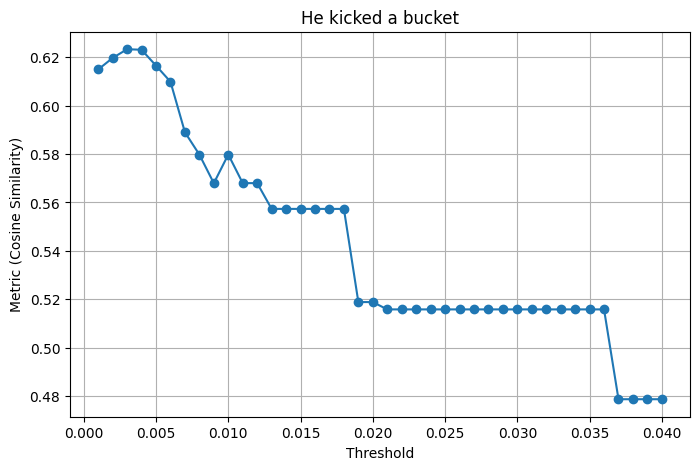

Threshold Sweep: 100%|██████████| 40/40 [02:20<00:00,  3.51s/it]



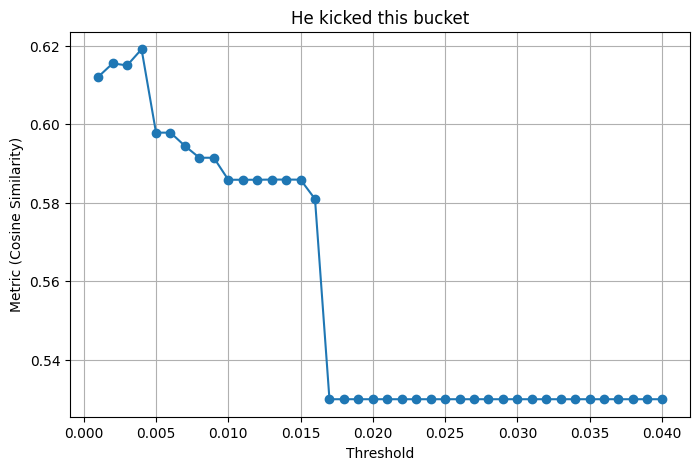

Threshold Sweep: 100%|██████████| 40/40 [07:45<00:00, 11.63s/it]



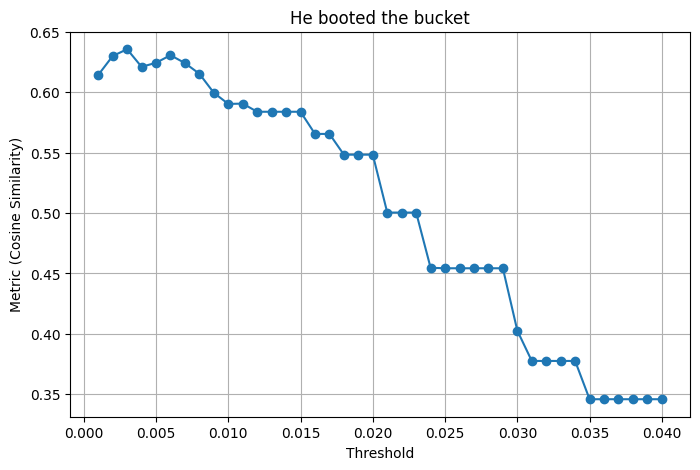

Threshold Sweep: 100%|██████████| 40/40 [04:30<00:00,  6.76s/it]



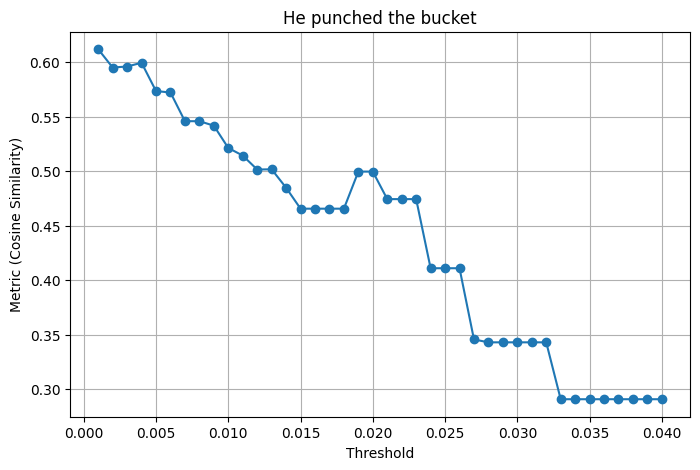

In [2]:
_ = multi_corrupted_threshold_sweep(model, max_layer=4,
                                      original_text="He kicked the bucket",
                                      corrupted_texts=["He kicked the buckets", "He kicked the pail", "He kicked a bucket", "He kicked this bucket", "He booted the bucket", "He punched the bucket"],
                                      target_text="He died",
                                      min_token_pos=2,
                                      thresholds=(0.001, 0.04, 0.001),
                                      corrupt_q=True,
                                      separate_kv=True)

In [3]:
# from simple_acdc import *
# _ = threshold_sweep(model, max_layer=4,
#                  original_text="He kicked the bucket", corrupted_text="He kicked the buckets", target_text="He died", thresholds=(0.001, 0.04, 0.001), min_token_pos=2, corrupt_q=True)


Circuit visualization saved to bucket_buckets_circuit.png


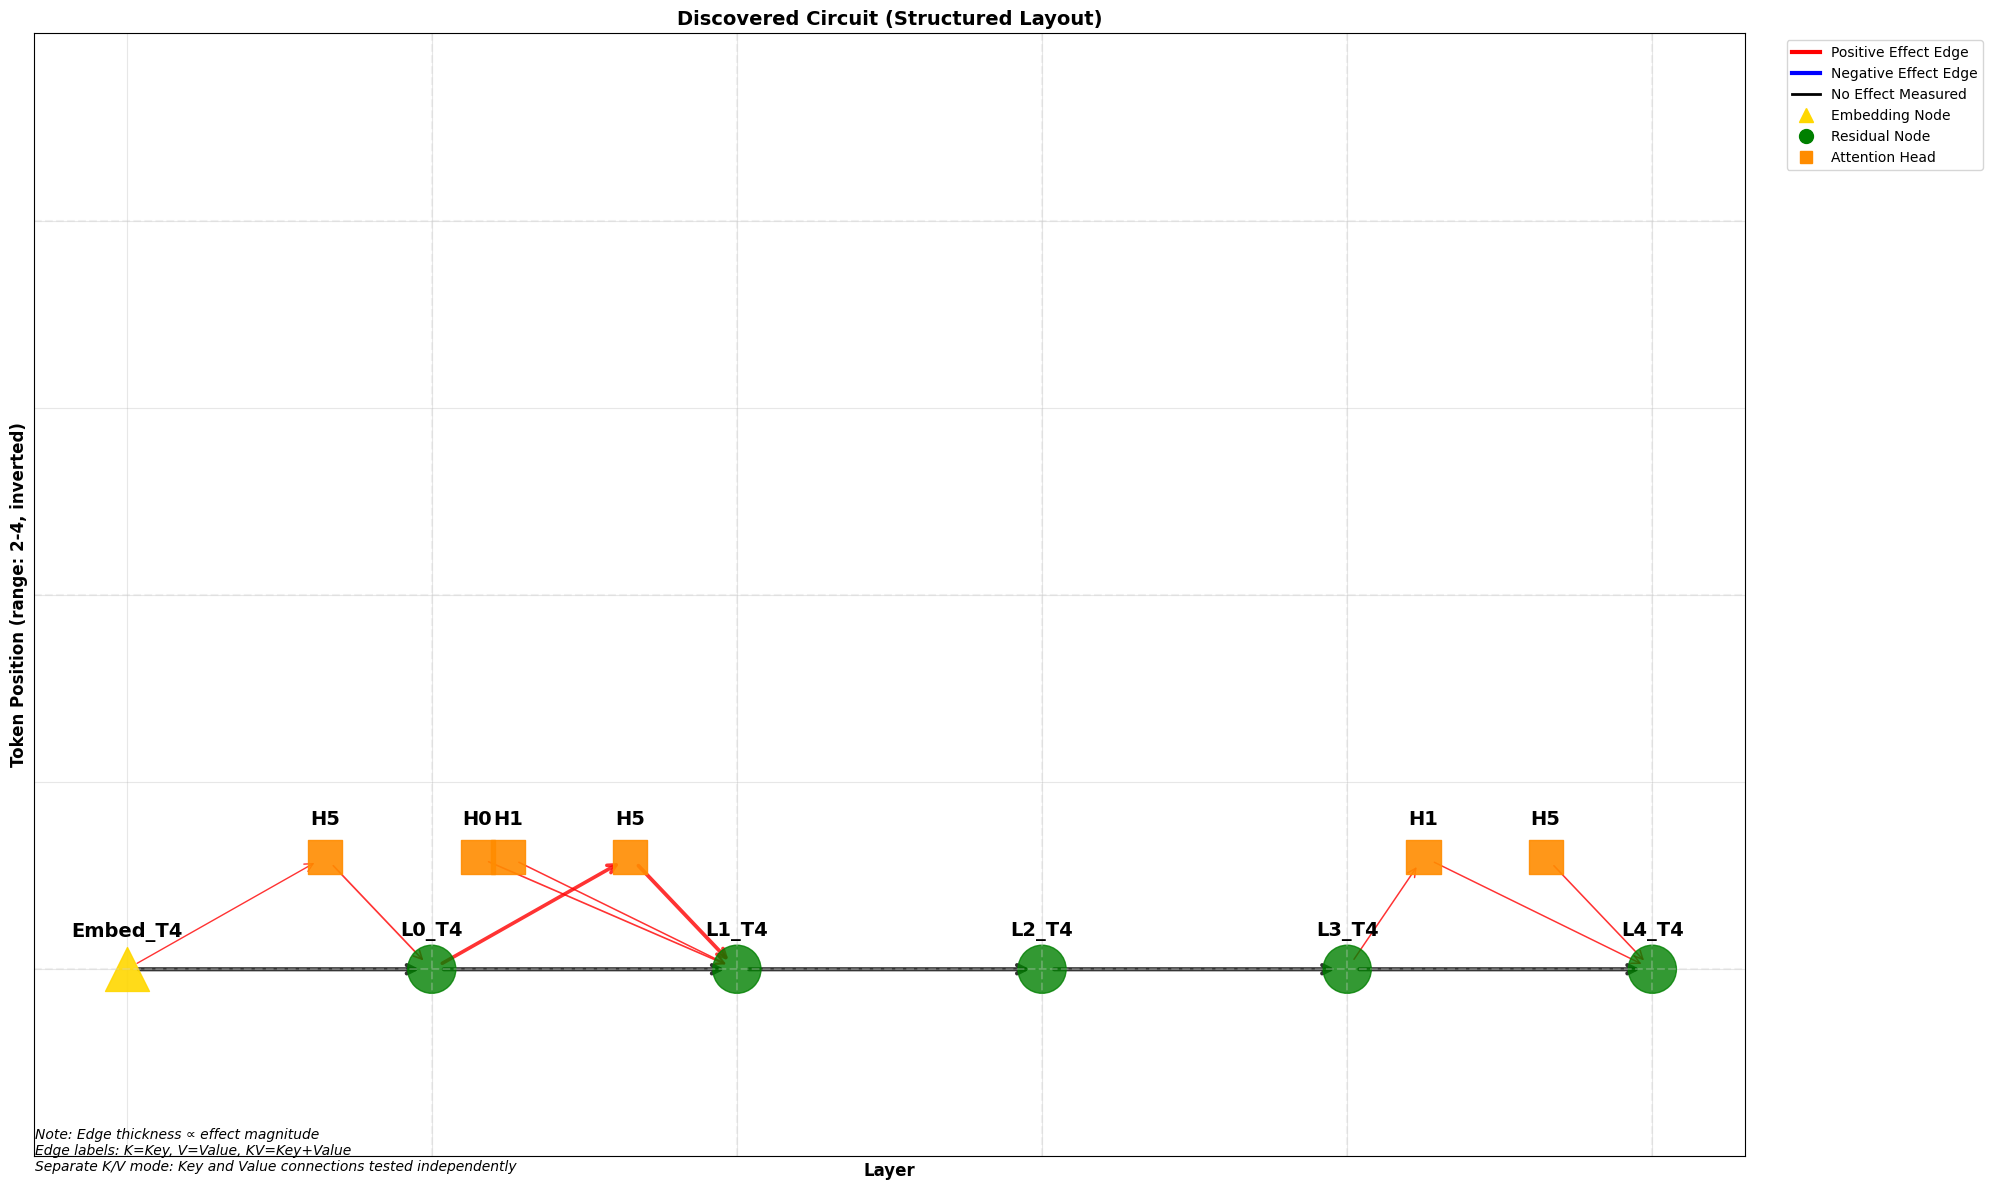


Circuit Summary:
Nodes: 12
Edges: 14

Edges by effect size:
  L1H5_T4 → L1_T4 (attn_out): 0.0738
  L0_T4 → L1H5_T4 (query): 0.0694
  L0H5_T4 → L0_T4 (attn_out): 0.0272
  L1H0_T4 → L1_T4 (attn_out): 0.0265
  L4H5_T4 → L4_T4 (attn_out): 0.0248
  L1H1_T4 → L1_T4 (attn_out): 0.0242
  L3_T4 → L4H1_T4 (query): 0.0233
  L4H1_T4 → L4_T4 (attn_out): 0.0231
  Embed_T4 → L0H5_T4 (query): 0.0211


In [31]:
from simple_acdc import SimpleACDC

# Initialize ACDC
acdc = SimpleACDC(model, max_layer=4, threshold=0.021, corrupt_q=True, separate_kv=True)

# Discover the "kicked the bucket" → "died" circuit
circuit, _ = acdc.discover_circuit(
    original_text="He kicked the bucket",
    corrupted_text="He kicked the buckets",
    target_text="He died",
    min_token_pos=2,
    quiet=True
)

# Visualize the discovered circuit
acdc.visualize_circuit(circuit, 
                       save_path="bucket_buckets_circuit.png",
                       min_token_pos=2)

Circuit visualization saved to bucket_buckets_circuit.png


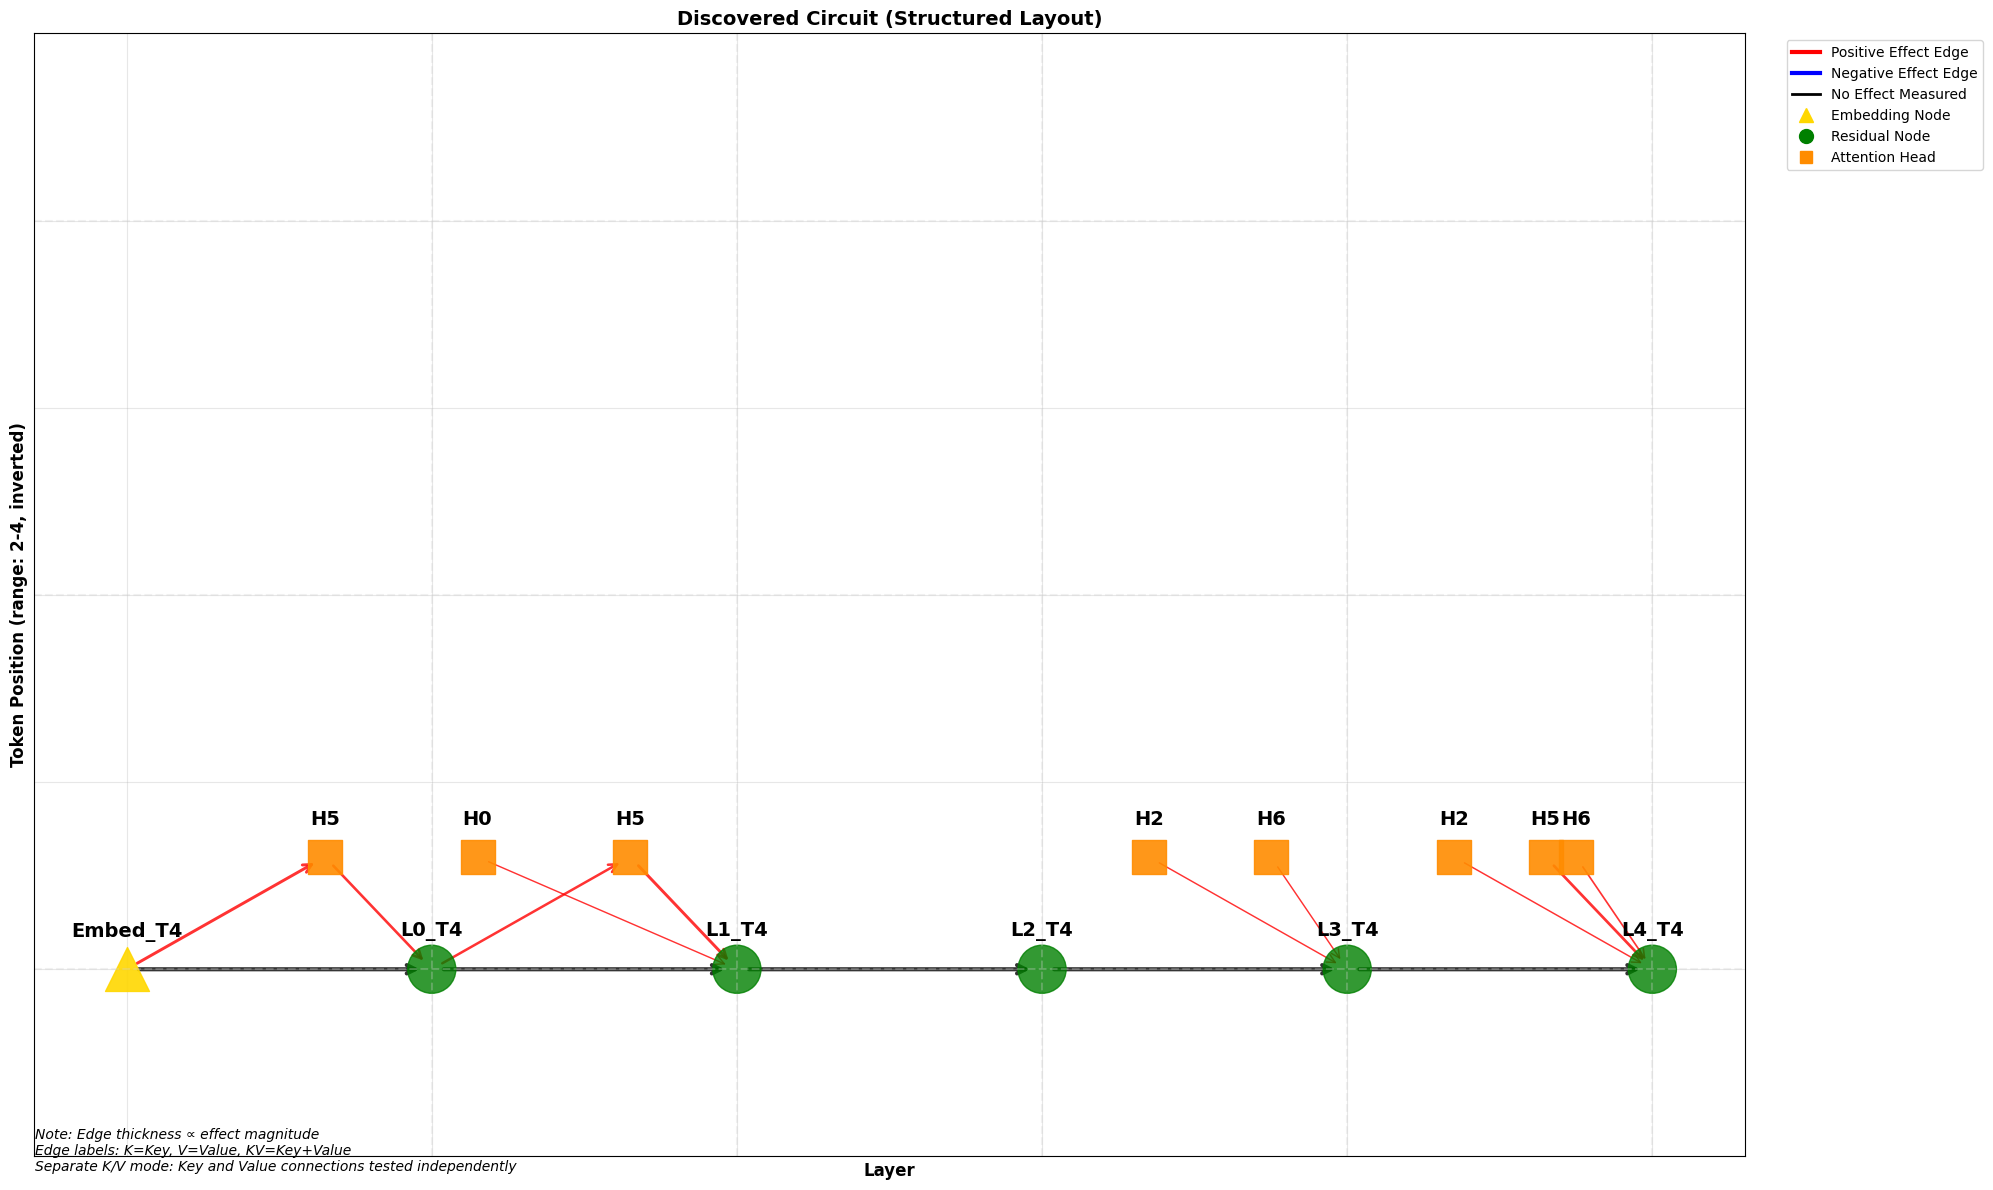


Circuit Summary:
Nodes: 14
Edges: 15

Edges by effect size:
  Embed_T4 → L0H5_T4 (query): 0.0385
  L1H5_T4 → L1_T4 (attn_out): 0.0381
  L4H5_T4 → L4_T4 (attn_out): 0.0347
  L0H5_T4 → L0_T4 (attn_out): 0.0329
  L0_T4 → L1H5_T4 (query): 0.0315
  L4H6_T4 → L4_T4 (attn_out): 0.0193
  L4H2_T4 → L4_T4 (attn_out): 0.0164
  L3H2_T4 → L3_T4 (attn_out): 0.0159
  L3H6_T4 → L3_T4 (attn_out): 0.0158
  L1H0_T4 → L1_T4 (attn_out): 0.0155


In [ ]:
# Initialize ACDC
acdc = SimpleACDC(model, max_layer=4, threshold=0.015, corrupt_q=True, separate_kv=True)

# Discover the "kicked the bucket" → "died" circuit
circuit, _ = acdc.discover_circuit(
    original_text="He kicked the bucket",
    corrupted_text="He kicked the pail",
    target_text="He died",
    min_token_pos=2,
    quiet=True
)

# Visualize the discovered circuit
acdc.visualize_circuit(circuit, 
                       save_path="bucket_pail_circuit.png",
                       min_token_pos=2)

Circuit visualization saved to bucket_buckets_circuit.png


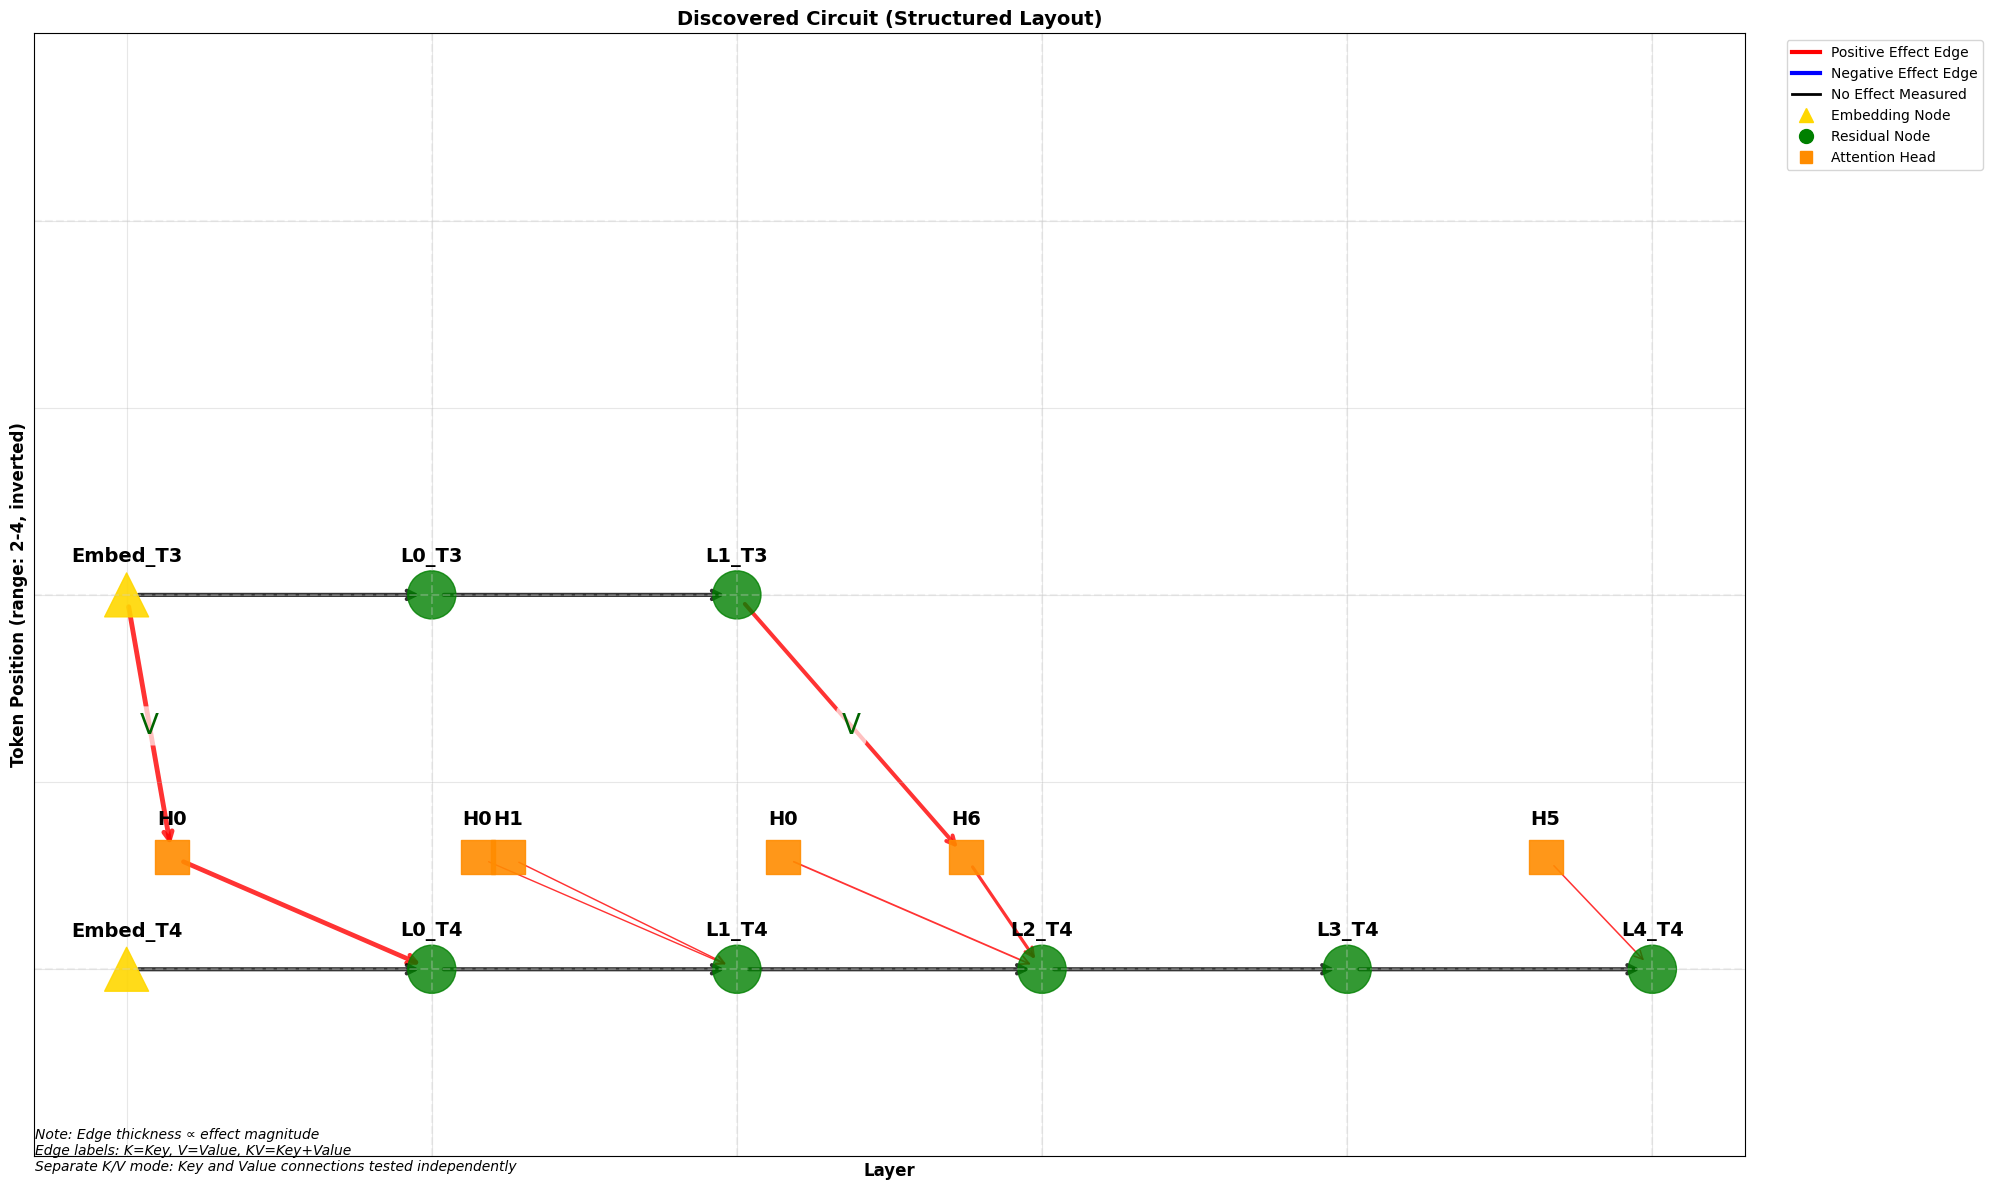


Circuit Summary:
Nodes: 15
Edges: 15

Edges by effect size:
  Embed_T3 → L0H0_T4 (value): 0.0859
  L0H0_T4 → L0_T4 (attn_out): 0.0830
  L1_T3 → L2H6_T4 (value): 0.0677
  L2H6_T4 → L2_T4 (attn_out): 0.0512
  L2H0_T4 → L2_T4 (attn_out): 0.0249
  L4H5_T4 → L4_T4 (attn_out): 0.0204
  L1H1_T4 → L1_T4 (attn_out): 0.0191
  L1H0_T4 → L1_T4 (attn_out): 0.0183


In [ ]:
# Initialize ACDC
acdc = SimpleACDC(model, max_layer=4, threshold=0.018, corrupt_q=True, separate_kv=True)

# Discover the "kicked the bucket" → "died" circuit
circuit, _ = acdc.discover_circuit(
    original_text="He kicked the bucket",
    corrupted_text="He kicked a bucket",
    target_text="He died",
    min_token_pos=2,
    quiet=True
)

# Visualize the discovered circuit
acdc.visualize_circuit(circuit, 
                       save_path="bucket_a_circuit.png",
                       min_token_pos=2)

Circuit visualization saved to bucket_this_circuit.png


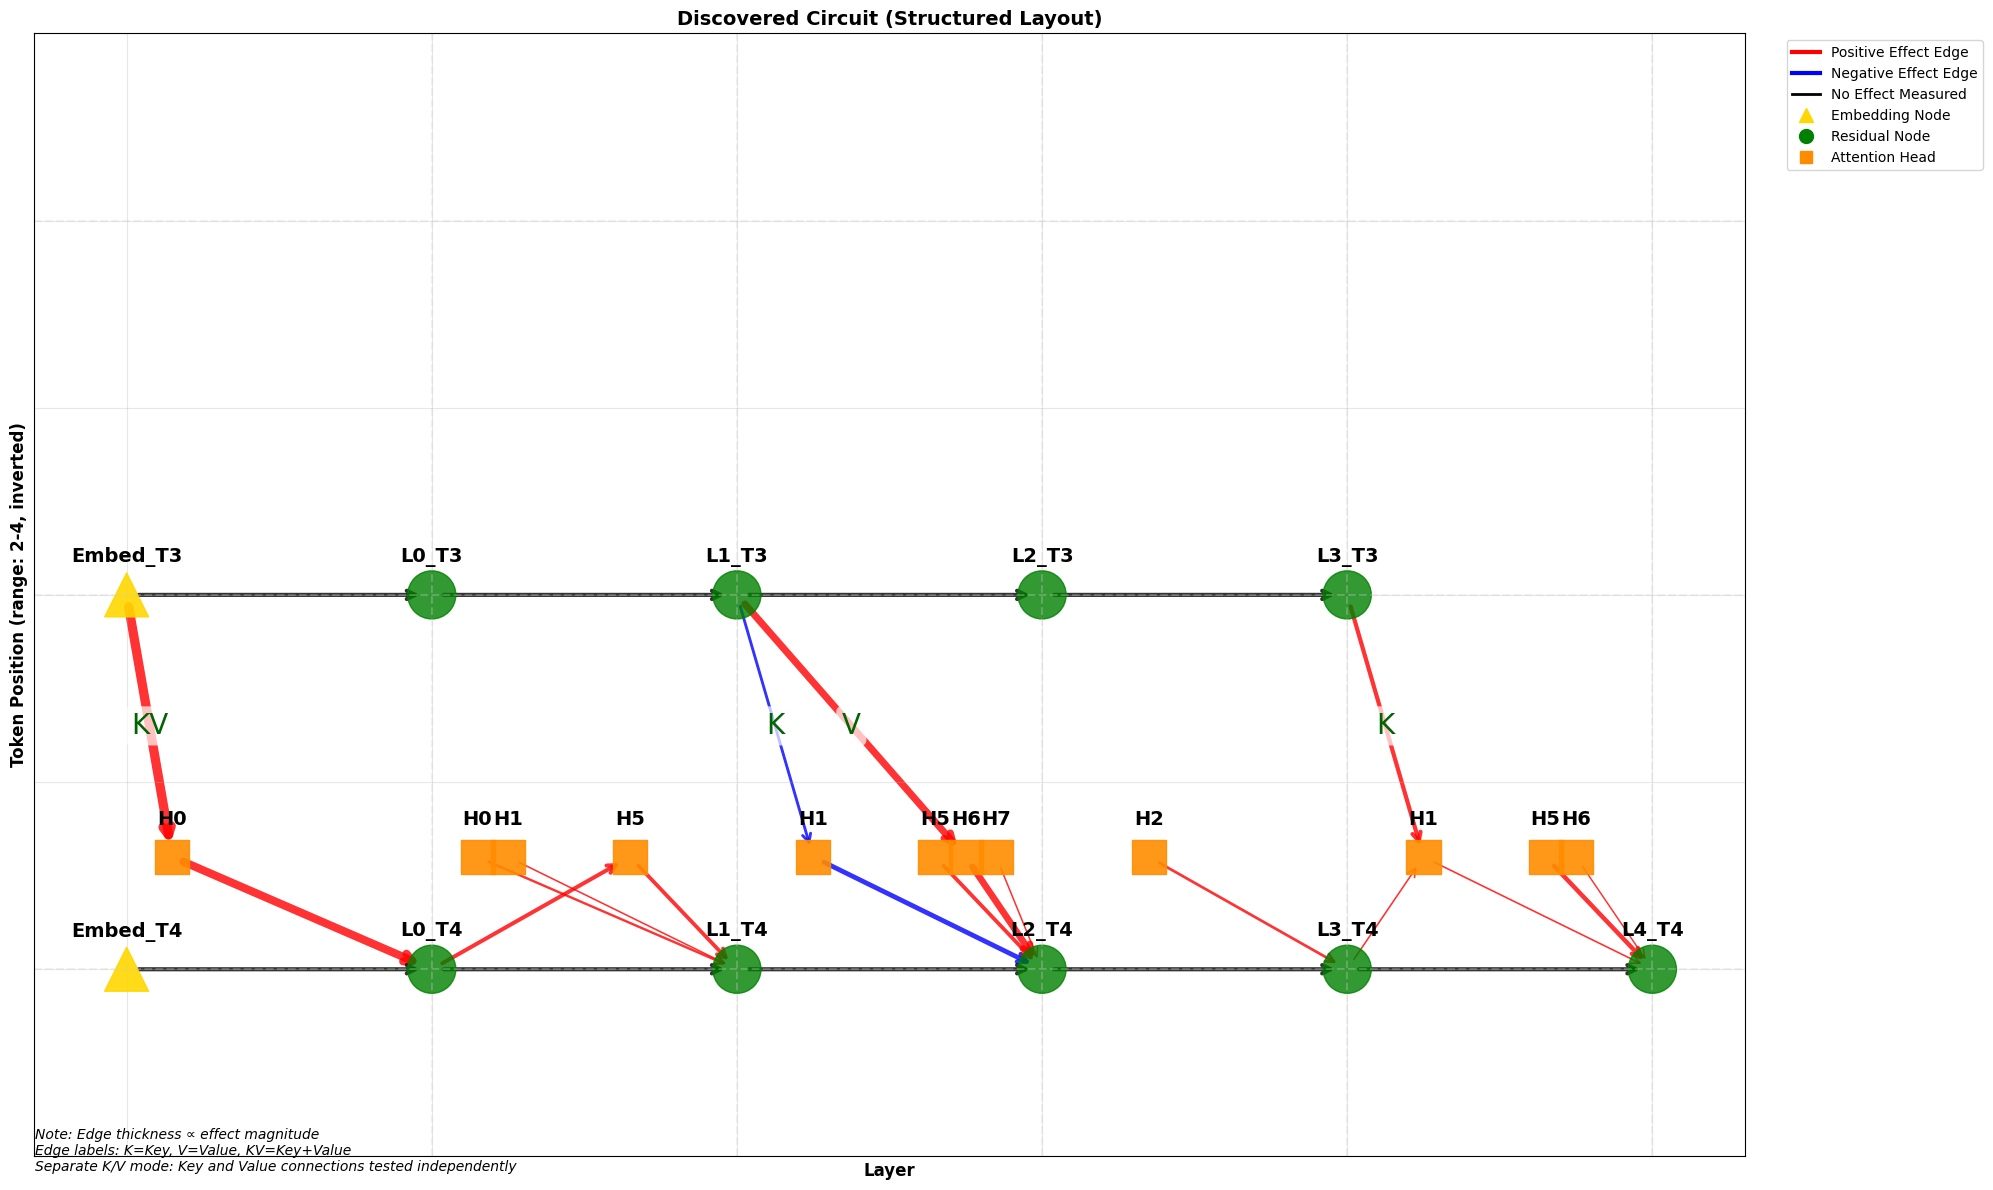


Circuit Summary:
Nodes: 23
Edges: 28

Edges by effect size:
  Embed_T3 → L0H0_T4 (value): 0.0430
  L0H0_T4 → L0_T4 (attn_out): 0.0361
  L1_T3 → L2H6_T4 (value): 0.0306
  L2H6_T4 → L2_T4 (attn_out): 0.0284
  L2H1_T4 → L2_T4 (attn_out): -0.0188
  L4H5_T4 → L4_T4 (attn_out): 0.0172
  L3_T3 → L4H1_T4 (key): 0.0159
  L0_T4 → L1H5_T4 (query): 0.0150
  L1H5_T4 → L1_T4 (attn_out): 0.0141
  L2H5_T4 → L2_T4 (attn_out): 0.0141
  L1_T3 → L2H1_T4 (key): -0.0099
  L3H2_T4 → L3_T4 (attn_out): 0.0093
  Embed_T3 → L0H0_T4 (key): 0.0088
  L1H0_T4 → L1_T4 (attn_out): 0.0079
  L4H1_T4 → L4_T4 (attn_out): 0.0050
  L3_T4 → L4H1_T4 (query): 0.0048
  L1H1_T4 → L1_T4 (attn_out): 0.0048
  L2H7_T4 → L2_T4 (attn_out): 0.0047
  L4H6_T4 → L4_T4 (attn_out): 0.0044


In [36]:
# Initialize ACDC
acdc = SimpleACDC(model, max_layer=4, threshold=0.004, corrupt_q=True, separate_kv=True)

# Discover the "kicked the bucket" → "died" circuit
circuit, _ = acdc.discover_circuit(
    original_text="He kicked the bucket",
    corrupted_text="He kicked this bucket",
    target_text="He died",
    min_token_pos=2,
    quiet=True
)

# Visualize the discovered circuit
acdc.visualize_circuit(circuit, 
                       save_path="bucket_this_circuit.png",
                       min_token_pos=2)

Circuit visualization saved to bucket_buckets_circuit.png


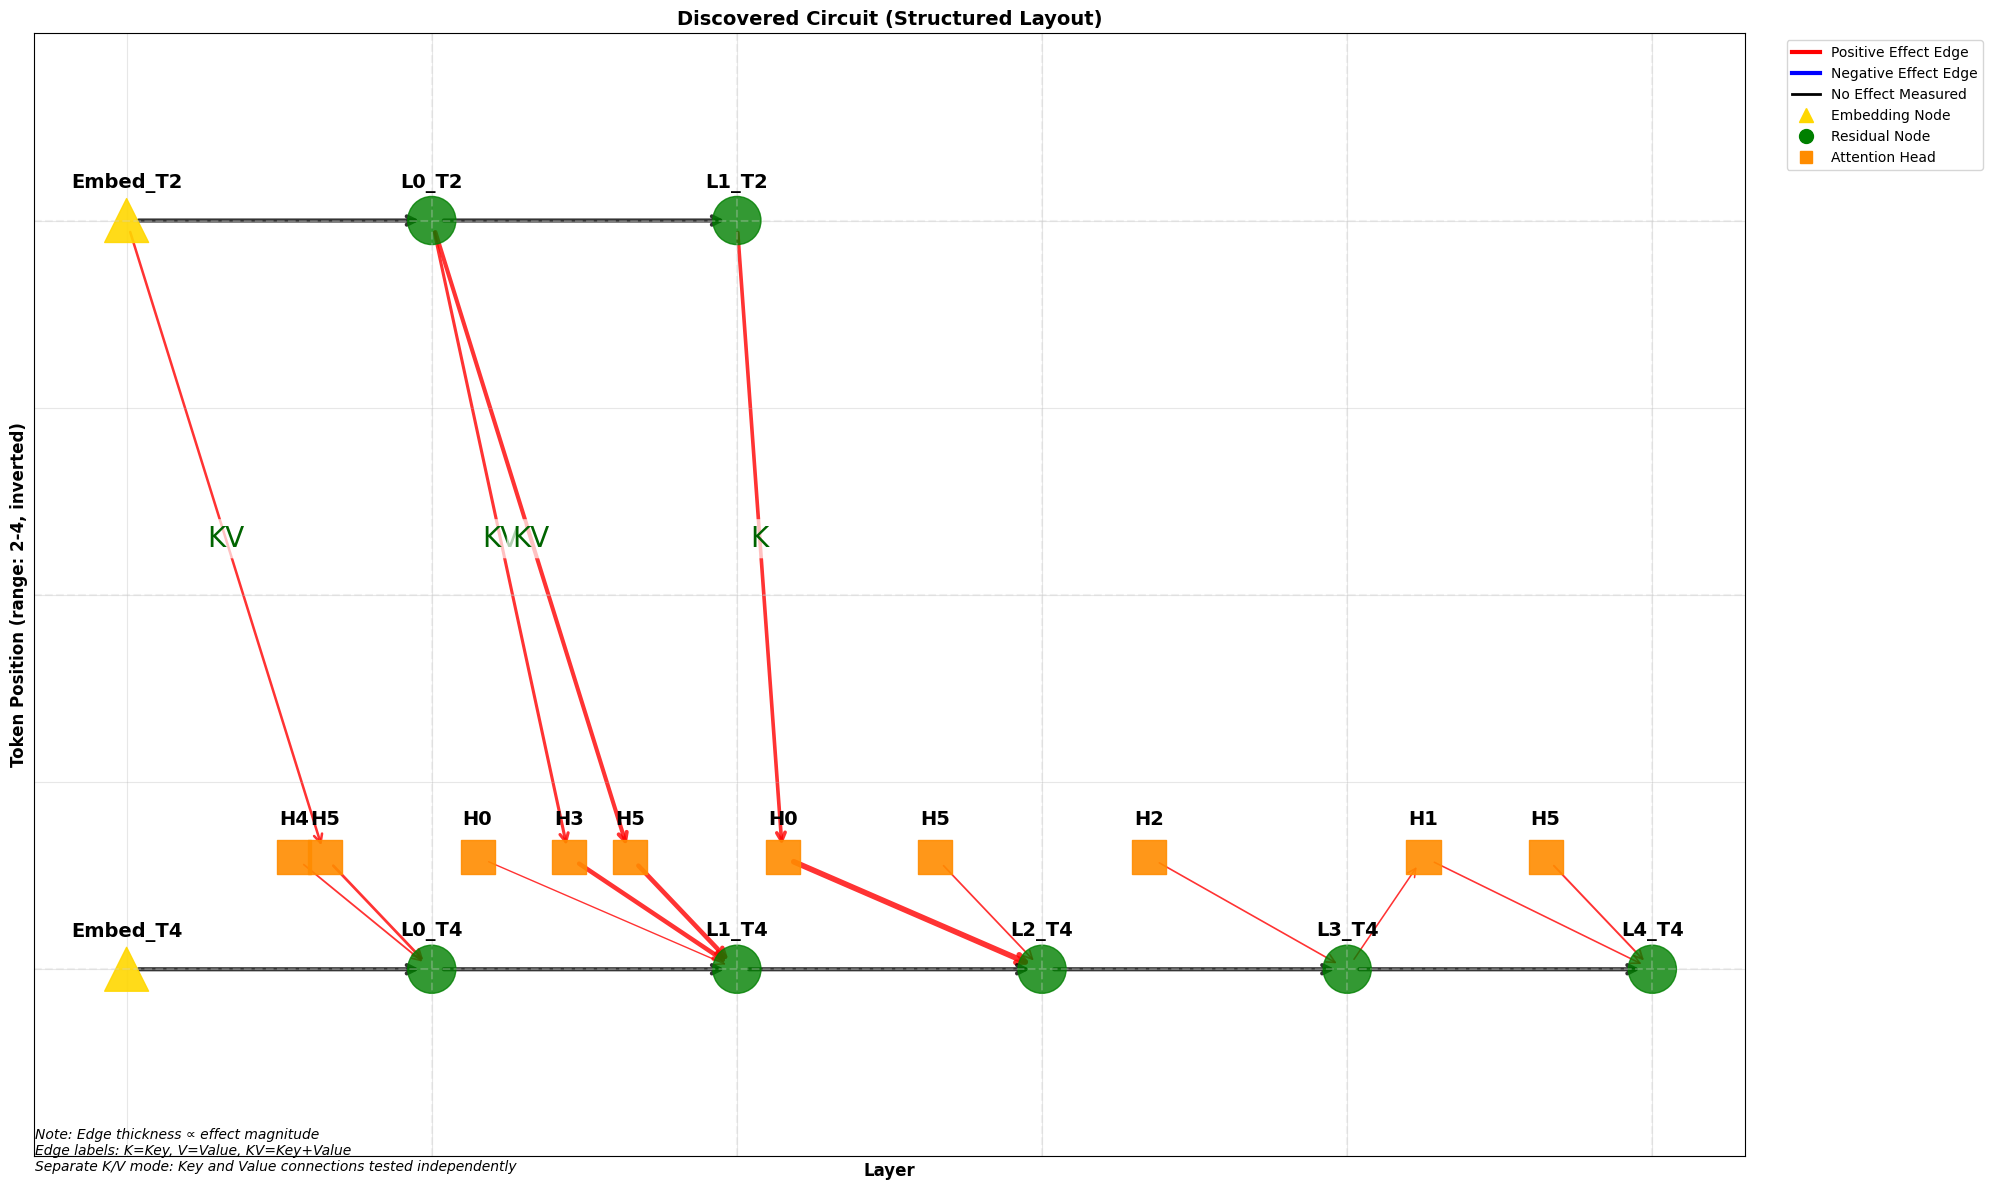


Circuit Summary:
Nodes: 19
Edges: 25

Edges by effect size:
  L2H0_T4 → L2_T4 (attn_out): 0.1161
  L1H5_T4 → L1_T4 (attn_out): 0.0903
  L1H3_T4 → L1_T4 (attn_out): 0.0869
  L0_T2 → L1H5_T4 (key): 0.0771
  L1_T2 → L2H0_T4 (key): 0.0666
  L0_T2 → L1H3_T4 (value): 0.0549
  L0_T2 → L1H3_T4 (key): 0.0503
  L0H5_T4 → L0_T4 (attn_out): 0.0466
  Embed_T2 → L0H5_T4 (value): 0.0425
  Embed_T2 → L0H5_T4 (key): 0.0314
  L4H5_T4 → L4_T4 (attn_out): 0.0305
  L0H4_T4 → L0_T4 (attn_out): 0.0278
  L0_T2 → L1H5_T4 (value): 0.0267
  L2H5_T4 → L2_T4 (attn_out): 0.0266
  L3H2_T4 → L3_T4 (attn_out): 0.0249
  L4H1_T4 → L4_T4 (attn_out): 0.0243
  L3_T4 → L4H1_T4 (query): 0.0234
  L1H0_T4 → L1_T4 (attn_out): 0.0201


In [ ]:
# Initialize ACDC
acdc = SimpleACDC(model, max_layer=4, threshold=0.02, corrupt_q=True, separate_kv=True)

# Discover the "kicked the bucket" → "died" circuit
circuit, _ = acdc.discover_circuit(
    original_text="He kicked the bucket",
    corrupted_text="He booted the bucket",
    target_text="He died",
    min_token_pos=2,
    quiet=True
)

# Visualize the discovered circuit
acdc.visualize_circuit(circuit, 
                       save_path="bucket_booted_circuit.png",
                       min_token_pos=2)

Circuit visualization saved to bucket_buckets_circuit.png


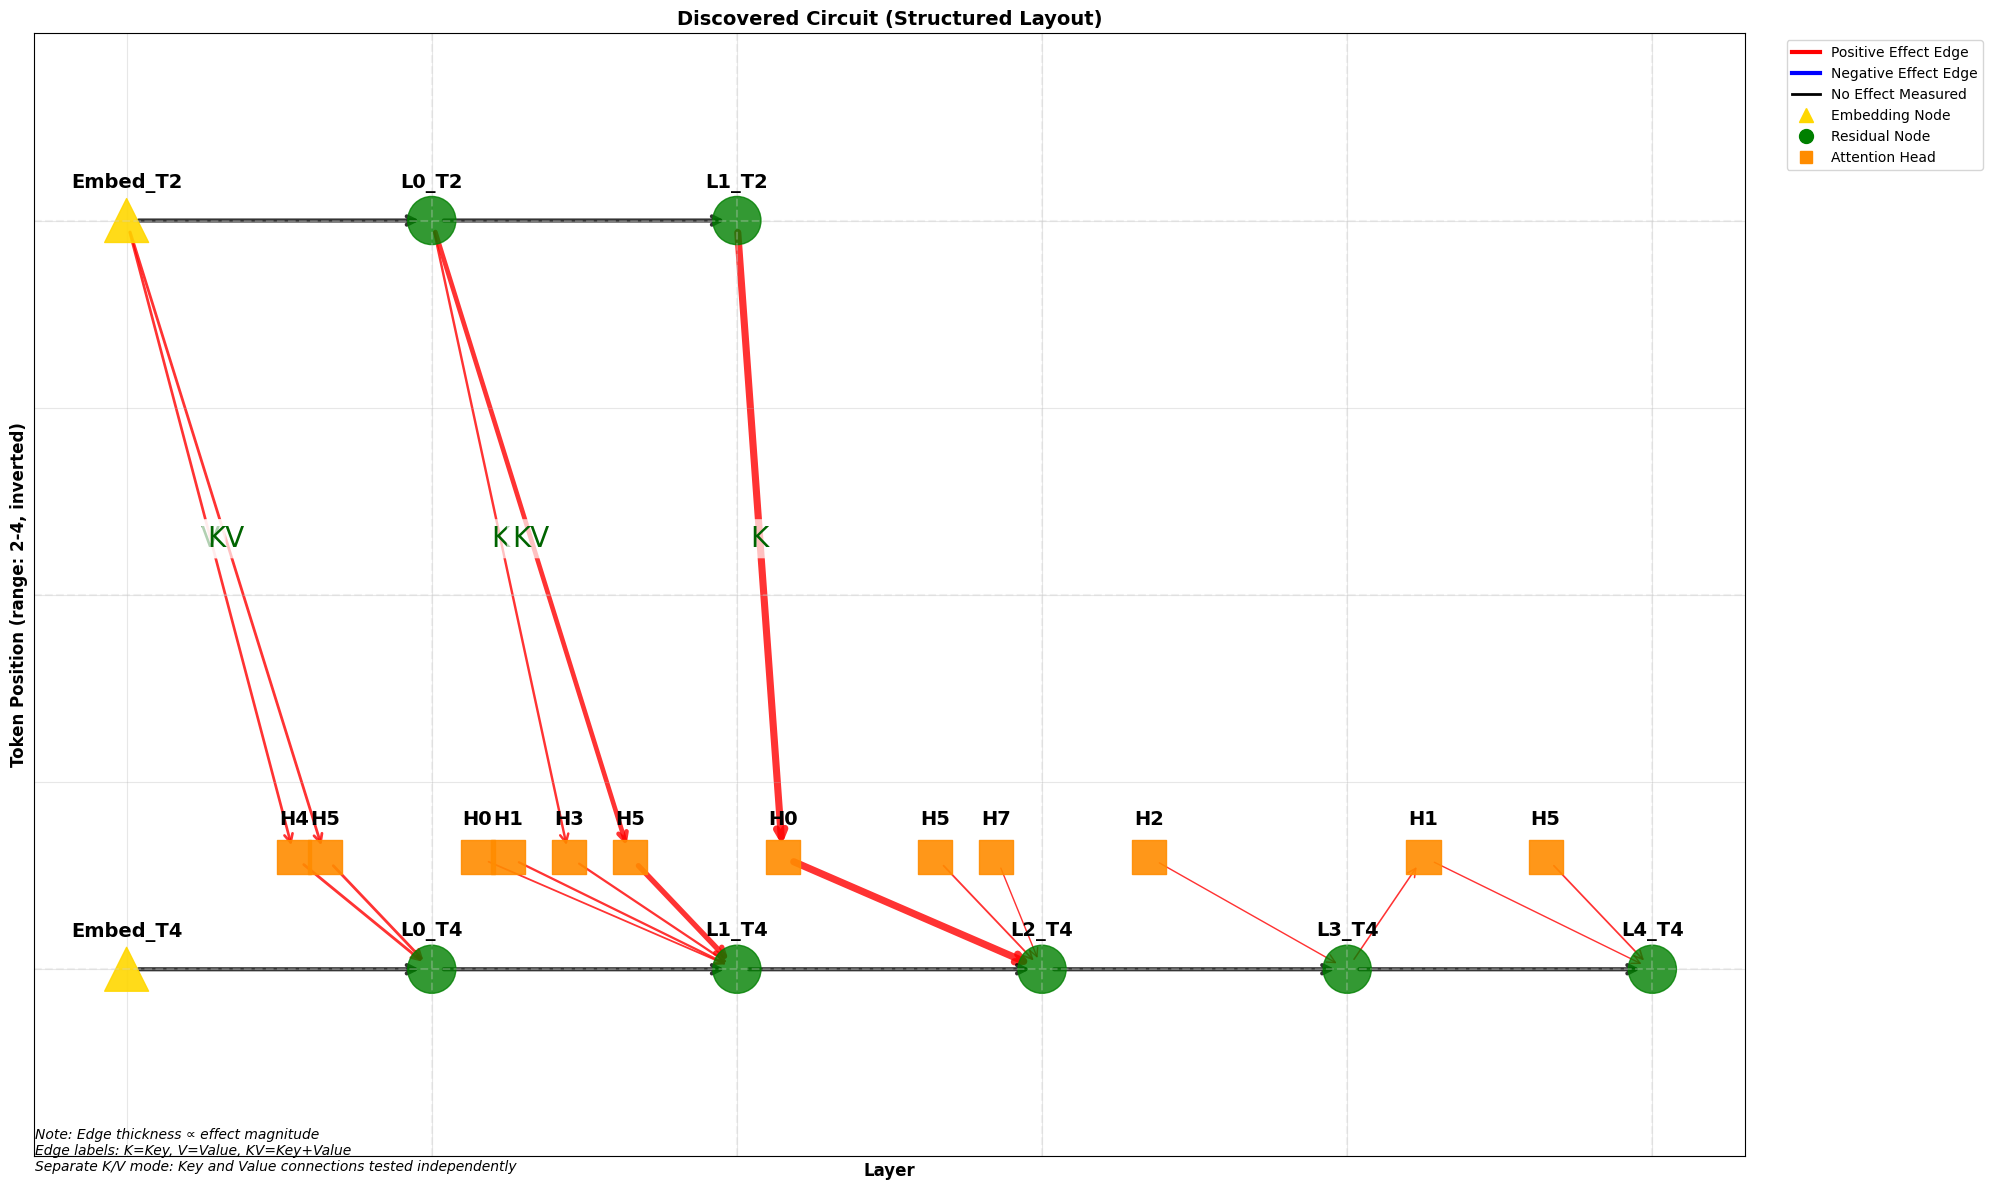


Circuit Summary:
Nodes: 21
Edges: 27

Edges by effect size:
  L2H0_T4 → L2_T4 (attn_out): 0.1792
  L1_T2 → L2H0_T4 (key): 0.1772
  L1H5_T4 → L1_T4 (attn_out): 0.1253
  L0_T2 → L1H5_T4 (key): 0.1039
  L0H4_T4 → L0_T4 (attn_out): 0.0564
  L0H5_T4 → L0_T4 (attn_out): 0.0549
  Embed_T2 → L0H5_T4 (value): 0.0549
  Embed_T2 → L0H4_T4 (value): 0.0524
  L0_T2 → L1H3_T4 (key): 0.0463
  L1H1_T4 → L1_T4 (attn_out): 0.0428
  L1H3_T4 → L1_T4 (attn_out): 0.0425
  Embed_T2 → L0H5_T4 (key): 0.0340
  L2H5_T4 → L2_T4 (attn_out): 0.0327
  L1H0_T4 → L1_T4 (attn_out): 0.0318
  L4H5_T4 → L4_T4 (attn_out): 0.0305
  L3_T4 → L4H1_T4 (query): 0.0270
  L0_T2 → L1H5_T4 (value): 0.0246
  L3H2_T4 → L3_T4 (attn_out): 0.0236
  L4H1_T4 → L4_T4 (attn_out): 0.0236
  L2H7_T4 → L2_T4 (attn_out): 0.0234


In [ ]:
# Initialize ACDC
acdc = SimpleACDC(model, max_layer=4, threshold=0.023, corrupt_q=True, separate_kv=True)

# Discover the "kicked the bucket" → "died" circuit
circuit, _ = acdc.discover_circuit(
    original_text="He kicked the bucket",
    corrupted_text="He punched the bucket",
    target_text="He died",
    min_token_pos=2,
    quiet=True
)

# Visualize the discovered circuit
acdc.visualize_circuit(circuit, 
                       save_path="bucket_punched_circuit.png",
                       min_token_pos=2)